# News Classification via Headlines

In [1]:
#!pip install wordcloud
#!pip install nltk
#!pip install

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("BBC News.csv")

# DATA WRANGLING

In [4]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Understanding Features and Target Variables

In [5]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [6]:
data.shape

(1490, 3)

In [7]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for NULL values

In [8]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# Countplot of Target Variable(Category)

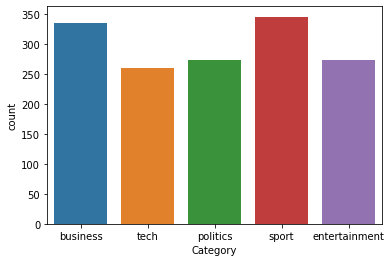

In [9]:
sns.countplot(data.Category)

In [10]:
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


# Distribution Plot

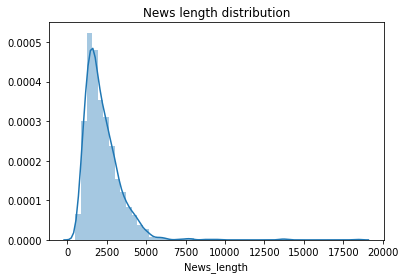

In [11]:
sns.distplot(data['News_length']).set_title('News length distribution');


# WordCloud

In [12]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

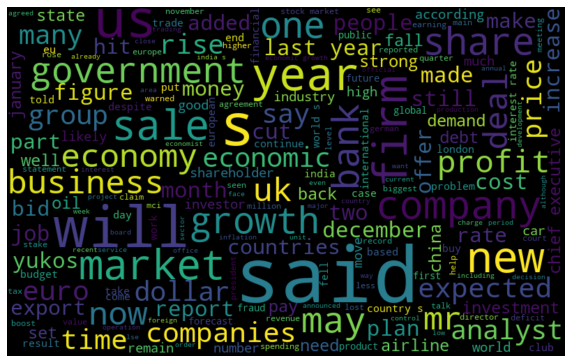

In [13]:
subset=data[data.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

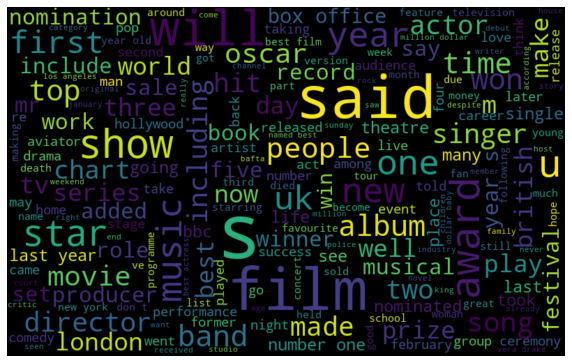

In [14]:
subset=data[data.Category=="entertainment"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

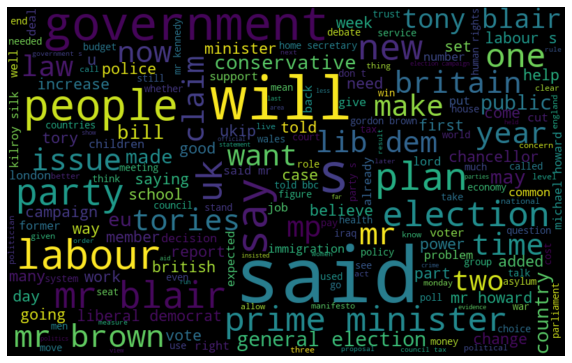

In [15]:
subset=data[data.Category=="politics"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

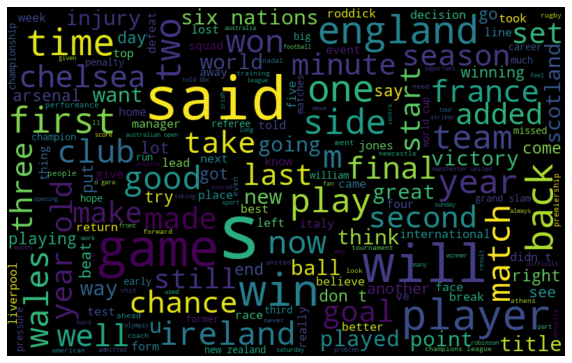

In [16]:
subset=data[data.Category=="sport"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

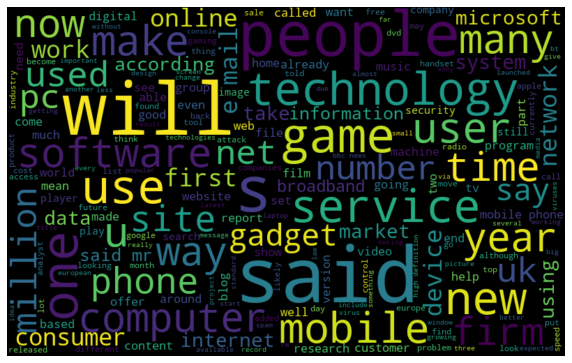

In [17]:
subset=data[data.Category=="tech"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)

# Feature Engineering

Removing the special characters<br>
1) \r<br>
2) \n<br>

Removing Punctuations and Stopwords

In [18]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [19]:
#nltk.download('punkt')

In [20]:
data['Text_parsed'] = data['Text'].apply(process_text)

In [21]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category']) 

In [23]:
data.head(10)

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0
5,1582,howard truanted to play snooker conservative...,politics,1588,howard truanted play snooker conservative lead...,2
6,651,wales silent on grand slam talk rhys williams ...,sport,1988,wales silent grand slam talk rhys williams say...,3
7,1797,french honour for director parker british film...,entertainment,1342,french honour director parker british film dir...,1
8,2034,car giant hit by mercedes slump a slump in pro...,business,2609,car giant hit mercedes slump slump profitabili...,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,1368,fockers fuel festive film chart comedy meet fo...,1


In [24]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=1)
X_train

1062    hackers recruited pc one million computers net...
607     lib dems unveil election slogan liberal democr...
1446    tories plan migrant health checks noneuropean ...
464     woolf murder sentence rethink plans give murde...
335     almagro continues spanish surge unseeded nicol...
                              ...                        
715     little britain two top comic list little brita...
905     nuclear dumpsite plan attacked plans allow for...
1096    crisis ahead social sciences national body des...
235     yukos unit fetches 9bn auction littleknown rus...
1061    karachi stocks hit historic high karachi stock...
Name: Text_parsed, Length: 1192, dtype: object

In [28]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

# TF-IDF for finding frequency of words

In [29]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
#pickle.dump(tfidf, open("tfidf.pkl","wb"))

print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1192, 300)
(298, 300)


# Building Models

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9328859060402684
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.91      0.89      0.90        55
           2       0.95      0.98      0.96        53
           3       0.94      0.93      0.93        67
           4       0.96      0.91      0.93        55

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.93      0.93      0.93       298



In [32]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [33]:
from sklearn.model_selection import GridSearchCV
hyperF = {'n_estimators': [100, 300, 500, 800, 1200],'max_depth': [5, 8, 15, 25, 30],
          'min_samples_split': [2, 5, 10, 15, 100],
              'min_samples_leaf': [1, 2, 5, 10]}

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, n_jobs=-1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [34]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [35]:
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
rdmodel = model1.fit(features_train, labels_train)
#pickle.dump(rdmodel, open("rd_model.pkl", "wb"))
model_predictions = model1.predict(features_test)

print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9530201342281879
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.96      0.91      0.93        55
           2       0.95      0.98      0.96        53
           3       0.95      0.94      0.95        67
           4       0.96      0.96      0.96        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



# Confusion Matrix

In [36]:
from sklearn import metrics
cm = metrics.confusion_matrix(labels_test, model_predictions)
print(cm)

[[66  1  0  0  1]
 [ 0 50  3  2  0]
 [ 1  0 52  0  0]
 [ 3  0  0 63  1]
 [ 0  1  0  1 53]]


# Predicting from Input

In [37]:
import pickle
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

docs_new = "Messi scored a goal in last match"
docs_new = [docs_new]

#LOAD MODEL
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("rd_model.pkl","rb"))


X_new_tfidf = loaded_tfidf.transform(docs_new)
predicted = loaded_model.predict(X_new_tfidf)

print('Predicted Category of The News is: ',category_list[predicted[0]])

Predicted Category of The News is:  sport


# Logistic Regression

In [38]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9496644295302014
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.96      0.95      0.95        55
           2       0.93      0.96      0.94        53
           3       0.97      0.94      0.95        67
           4       0.96      0.93      0.94        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



# Hyper Parameter Tuning (Logistic Regression)

In [39]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [40]:
model = LogisticRegression(C=1, penalty = 'l2')
lg_model = model.fit(features_train, labels_train)
#pickle.dump(lg_model, open("lg_model.pkl", "wb"))
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9496644295302014
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        68
           1       0.96      0.95      0.95        55
           2       0.93      0.96      0.94        53
           3       0.97      0.94      0.95        67
           4       0.96      0.93      0.94        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [42]:
from sklearn import metrics
cm = metrics.confusion_matrix(labels_test, model_predictions)
print(cm)

[[66  0  1  0  1]
 [ 0 52  3  0  0]
 [ 1  0 51  1  0]
 [ 3  0  0 63  1]
 [ 1  2  0  1 51]]


# Predicting from Input

In [43]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

docs_new = "Messi scored a goal in last match"
docs_new = [docs_new]

#LOAD MODEL
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("lg_model.pkl","rb"))


X_new_tfidf = loaded_tfidf.transform(docs_new)
predicted = loaded_model.predict(X_new_tfidf)

print('Predicted Category of The News is: ',category_list[predicted[0]])

Predicted Category of The News is:  sport


# KNeighborsClassifier

Accuracy remains the same after hyper paramter tuning

In [44]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9463087248322147
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.96      0.96      0.96        55
           2       0.95      0.98      0.96        53
           3       0.98      0.93      0.95        67
           4       0.90      0.96      0.93        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [45]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [46]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5],
             'leaf_size' : [20,30,40,50,70,80]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


In [47]:
bestF.best_params_

{'leaf_size': 20, 'n_neighbors': 6, 'p': 2}

In [48]:
model = KNeighborsClassifier(n_neighbors=6,p=2,leaf_size=20)
knnmodel = model.fit(features_train, labels_train)
#pickle.dump(knnmodel, open("knn_model.pkl", "wb"))
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9463087248322147
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.96      0.95      0.95        55
           2       0.95      0.98      0.96        53
           3       0.98      0.93      0.95        67
           4       0.91      0.96      0.94        55

    accuracy                           0.95       298
   macro avg       0.95      0.95      0.95       298
weighted avg       0.95      0.95      0.95       298



In [49]:
cm = metrics.confusion_matrix(labels_test, model_predictions)
print(cm)

[[63  0  2  0  3]
 [ 1 52  1  1  0]
 [ 1  0 52  0  0]
 [ 3  0  0 62  2]
 [ 0  2  0  0 53]]


# Predicting from Input

In [50]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

docs_new = "Messi scored a goal in last match"
docs_new = [docs_new]

#LOAD MODEL
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("knn_model.pkl","rb"))


X_new_tfidf = loaded_tfidf.transform(docs_new)
predicted = loaded_model.predict(X_new_tfidf)

print('Predicted Category of The News is: ',category_list[predicted[0]])

Predicted Category of The News is:  sport


# MultinominalNB

In [51]:
model = MultinomialNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9362416107382551
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.96      0.93      0.94        55
           2       0.96      0.94      0.95        53
           3       0.94      0.94      0.94        67
           4       0.93      0.91      0.92        55

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [52]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

# Hyper Paramter Tuning (Multinominal Naive Bayes)

In [53]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

alpha= [0, 1, 2, 3, 4, 5, 6, 7]

hyperF = dict(alpha=alpha)

model  = MultinomialNB()
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose =1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [54]:
bestF.best_params_

{'alpha': 1}

In [55]:
model = MultinomialNB(alpha = 1.0)
nbayes = model.fit(features_train, labels_train)
#pickle.dump(nbayes, open("nb_model.pkl", "wb"))
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9362416107382551
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.96      0.93      0.94        55
           2       0.96      0.94      0.95        53
           3       0.94      0.94      0.94        67
           4       0.93      0.91      0.92        55

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [56]:
cm = metrics.confusion_matrix(labels_test, model_predictions)
print(cm)

[[65  0  1  0  2]
 [ 0 51  1  1  2]
 [ 2  0 50  1  0]
 [ 4  0  0 63  0]
 [ 1  2  0  2 50]]


# Predicting from Input

In [57]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

docs_new = "Messi scored a goal in last match"
docs_new = [docs_new]

#LOAD MODEL
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("nb_model.pkl","rb"))


X_new_tfidf = loaded_tfidf.transform(docs_new)
predicted = loaded_model.predict(X_new_tfidf)

print('Predicted Category of The News is: ',category_list[predicted[0]])

Predicted Category of The News is:  sport


# Support Vector Classifier

In [58]:
from sklearn.svm import LinearSVC

In [59]:
model = LinearSVC()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9664429530201343
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.96      0.98      0.97        55
           2       0.94      0.96      0.95        53
           3       0.98      0.96      0.97        67
           4       0.96      0.98      0.97        55

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



In [60]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

# Hyper Paramter Tuning (SVC)

In [61]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

fit_intercept = [True, False]
multi_class = ['ovr', 'crammer_singer']
loss = ['hinge', 'squared_hinge']
penalty = ['l1', 'l2']

hyperF = dict(fit_intercept = fit_intercept, multi_class = multi_class, loss = loss, penalty = penalty)

model  = LinearSVC()
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [62]:
bestF.best_params_

{'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'hinge', 'fit_intercept': True}

In [63]:
model = LinearSVC(penalty = 'l2', multi_class = 'ovr', fit_intercept = True)
svc_model = model.fit(features_train, labels_train)
#pickle.dump(svc_model, open("svc_model.pkl", "wb"))
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9664429530201343
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        68
           1       0.96      0.98      0.97        55
           2       0.94      0.96      0.95        53
           3       0.98      0.96      0.97        67
           4       0.96      0.98      0.97        55

    accuracy                           0.97       298
   macro avg       0.97      0.97      0.97       298
weighted avg       0.97      0.97      0.97       298



In [64]:
cm = metrics.confusion_matrix(labels_test, model_predictions)
print(cm)

[[65  1  1  0  1]
 [ 0 54  1  0  0]
 [ 1  0 51  1  0]
 [ 1  0  1 64  1]
 [ 0  1  0  0 54]]


# Predicting from Input

In [65]:
category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

docs_new = "Messi scored a goal in last match"
docs_new = [docs_new]

#LOAD MODEL
loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
loaded_model = pickle.load(open("svc_model.pkl","rb"))


X_new_tfidf = loaded_tfidf.transform(docs_new)
predicted = loaded_model.predict(X_new_tfidf)

print('Predicted Category of The News is: ',category_list[predicted[0]])

Predicted Category of The News is:  sport


# Predicted - Original

In [66]:
category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]
result_bayes = pd.DataFrame( {'true_labels': labels_test,'predicted_labels': model_predictions})
result_bayes.to_csv('res_bayes.csv', sep = ',')

for predicted_item, result in zip(model_predictions, labels_test):
    print(category_list[predicted_item], ' - ', category_list[result])

tech  -  tech
politics  -  politics
business  -  business
business  -  business
entertainment  -  entertainment
business  -  business
business  -  business
politics  -  politics
sport  -  politics
politics  -  politics
sport  -  sport
entertainment  -  entertainment
sport  -  sport
tech  -  tech
entertainment  -  entertainment
sport  -  sport
entertainment  -  entertainment
tech  -  tech
entertainment  -  entertainment
sport  -  sport
sport  -  sport
sport  -  sport
tech  -  tech
politics  -  politics
politics  -  politics
tech  -  tech
politics  -  politics
business  -  business
entertainment  -  entertainment
politics  -  politics
business  -  business
tech  -  tech
entertainment  -  entertainment
tech  -  business
tech  -  tech
sport  -  sport
business  -  business
sport  -  sport
sport  -  sport
sport  -  sport
politics  -  politics
entertainment  -  entertainment
politics  -  politics
entertainment  -  entertainment
entertainment  -  entertainment
business  -  business
sport  -  s

In [67]:
#!pip install gradio

# GUI USING GRADIO

In [68]:
import gradio as gr

In [69]:
def classify_news(inp):
    
    category_list = ['business', 'entertainment', 'politics', 'sport', 'tech' ]

    docs_new = [inp]

    #LOAD MODEL
    loaded_tfidf = pickle.load(open("tfidf.pkl","rb"))
    loaded_model = pickle.load(open("svc_model.pkl","rb"))


    X_new_tfidf = loaded_tfidf.transform(docs_new)
    predicted = loaded_model.predict(X_new_tfidf)
    output = category_list[predicted[0]]
    
    return "Predicted Class is: " + output

gr.Interface(classify_news,
             "textbox", 
             gr.outputs.Textbox()).launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://12050.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://12050.gradio.app')